| **Inicio** | **atrás 3** |
|----------- |-------------- |
| [🏠](../../../README.md) | [⏪](./3.OPERACIONES_BAYESIANAS.ipynb)|

# **4. CLASIFICACIÓN BAYESIANA**

## **Análisis de decisiones**

El análisis de decisiones en la clasificación bayesiana es un enfoque que permite tomar decisiones óptimas basadas en las probabilidades calculadas a partir de un modelo de clasificación bayesiana. Este enfoque se utiliza cuando se desea clasificar una observación en una de varias categorías y se busca minimizar los costos asociados con las decisiones incorrectas.

El análisis de decisiones en la clasificación bayesiana se basa en el cálculo de las probabilidades a posteriori de cada clase dada una observación y los costos asociados con las decisiones incorrectas. Estos costos pueden ser representados mediante una matriz de costos, donde cada elemento de la matriz indica el costo asociado con la clasificación incorrecta de una clase a otra.

A continuación, se presenta un ejemplo de cómo realizar un análisis de decisiones en la clasificación bayesiana utilizando Python:

In [1]:
import numpy as np

# Matriz de costos
cost_matrix = np.array([[0, 1], [5, 0]])

# Probabilidades a posteriori de las clases
posterior_probs = np.array([0.8, 0.2])

# Cálculo de los costos esperados
expected_costs = np.dot(cost_matrix, posterior_probs)

# Clase de menor costo esperado
predicted_class = np.argmin(expected_costs)

print("Costos esperados:", expected_costs)
print("Clase predicha:", predicted_class)

Costos esperados: [0.2 4. ]
Clase predicha: 0


En este ejemplo, se define una matriz de costos `cost_matrix` que representa los costos asociados con las decisiones incorrectas. En este caso, se utiliza una matriz 2x2, donde el elemento (`i`, `j`) representa el costo de clasificar una observación de la clase `i` como clase `j`.

Luego, se definen las probabilidades a posteriori de las clases `posterior_probs`, que pueden ser calculadas a partir de un modelo de clasificación bayesiana. En este ejemplo, se considera que las probabilidades a posteriori son [0.8, 0.2], lo que indica una mayor probabilidad de pertenecer a la clase 0 que a la clase 1.

A continuación, se calculan los costos esperados mediante el producto entre la matriz de costos y las probabilidades a posteriori. El resultado es un vector `expected_costs` que indica los costos esperados asociados con cada clase.

Finalmente, se utiliza la función `argmin` de NumPy para determinar la clase de menor costo esperado, es decir, la clase que minimiza los costos asociados con las decisiones incorrectas. El resultado se almacena en la variable `predicted_class`.

Es importante tener en cuenta que el análisis de decisiones en la clasificación bayesiana depende tanto de las probabilidades a posteriori como de los costos asociados con las decisiones incorrectas. Estos costos pueden variar según el contexto y los objetivos específicos del problema de clasificación. El enfoque de análisis de decisiones permite seleccionar la acción óptima que minimice los costos esperados en función de las probabilidades y los costos definidos.

## **El papel de la distribución a priori**

En la clasificación bayesiana, la distribución a priori juega un papel importante al proporcionar información inicial sobre las probabilidades de las clases antes de observar los datos. Esta distribución refleja el conocimiento o las creencias previas que se tienen sobre la distribución de las clases y ayuda a regularizar y estabilizar la estimación de las probabilidades a posteriori.

La distribución a priori se combina con la evidencia observada para obtener las probabilidades a posteriori utilizando el teorema de Bayes. La distribución a priori actúa como una influencia inicial en las probabilidades a posteriori y tiene un impacto en la clasificación final.

A continuación se muestra un ejemplo de cómo la distribución a priori puede afectar la clasificación bayesiana utilizando Python:



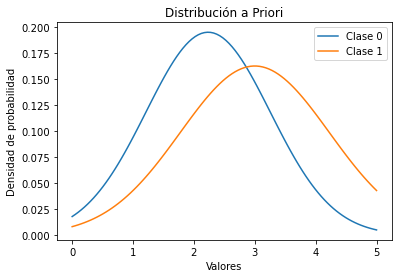

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Datos observados
data = np.array([1, 1.5, 2.2, 3, 3.5, 4.5])

# Clases
classes = np.array([0, 1, 0, 1, 0, 1])

# Distribución a priori de las clases
prior_probs = np.array([0.5, 0.5])

# Estimación de la media y desviación estándar de cada clase
class_means = [np.mean(data[classes == i]) for i in range(2)]
class_std = [np.std(data[classes == i]) for i in range(2)]

# Función de densidad de probabilidad a priori
x = np.linspace(0, 5, 100)
prior_density = [norm.pdf(x, class_means[i], class_std[i]) * prior_probs[i] for i in range(2)]

# Gráfica de la distribución a priori
plt.plot(x, prior_density[0], label='Clase 0')
plt.plot(x, prior_density[1], label='Clase 1')
plt.xlabel('Valores')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución a Priori')
plt.legend()
plt.show()

En este ejemplo, se tienen datos observados y se desea clasificarlos en dos clases (0 y 1). Se define una distribución a priori para cada clase utilizando la media y la desviación estándar estimadas de los datos correspondientes a cada clase. En este caso, se asume que ambas clases tienen una distribución normal.

Se calcula la función de densidad de probabilidad para cada clase multiplicada por la probabilidad a priori correspondiente. Luego se grafican las distribuciones a priori para visualizar cómo se distribuye la probabilidad en función de los valores.

La distribución a priori puede tener un impacto significativo en la clasificación bayesiana. Si la distribución a priori es informativa o sesgada hacia una clase en particular, esto puede influir en las probabilidades a posteriori y, por lo tanto, en la clasificación final. Una distribución a priori no informativa, como una distribución uniforme, asigna probabilidades iguales a todas las clases y no tiene un sesgo hacia ninguna clase en particular.

Es importante destacar que la elección de la distribución a priori debe basarse en el conocimiento y las creencias previas sobre el problema en cuestión. La distribución a priori puede actualizarse a medida que se recopilan más datos y se obtienen probabilidades a posteriori más precisas.

## **Estimación del núcleo de la densidad**

La estimación del núcleo de densidad en la clasificación bayesiana es una técnica utilizada para modelar y estimar la densidad de probabilidad de las clases a partir de los datos observados. Esta técnica es útil cuando no se conocen las distribuciones subyacentes de las clases y se desea obtener una representación suave de la densidad de probabilidad.

El núcleo de densidad es una función que se utiliza para suavizar los datos y estimar la densidad de probabilidad subyacente. El enfoque más común para la estimación del núcleo de densidad es el método de ventana, donde se utiliza una función de núcleo, como la función gaussiana, centrada en cada punto de datos para asignarle una contribución a la estimación de la densidad.

A continuación se muestra un ejemplo de cómo realizar la estimación del núcleo de densidad en la clasificación bayesiana utilizando Python:

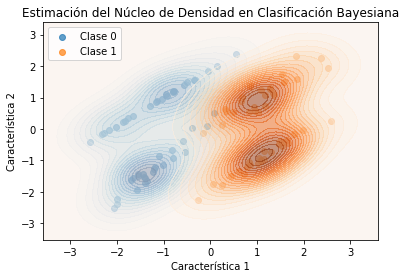

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KernelDensity

# Generar datos de ejemplo
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Separar datos por clase
X_class0 = X[y == 0]
X_class1 = X[y == 1]

# Estimación del núcleo de densidad para la clase 0
kde_class0 = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X_class0)
density_class0 = np.exp(kde_class0.score_samples(X))

# Estimación del núcleo de densidad para la clase 1
kde_class1 = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X_class1)
density_class1 = np.exp(kde_class1.score_samples(X))

# Crear una malla de valores para la gráfica
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Evaluar las densidades en la malla de valores
zz_class0 = kde_class0.score_samples(np.c_[xx.ravel(), yy.ravel()])
zz_class1 = kde_class1.score_samples(np.c_[xx.ravel(), yy.ravel()])

# Dar forma a los resultados de densidad para que coincidan con la malla
zz_class0 = np.exp(zz_class0).reshape(xx.shape)
zz_class1 = np.exp(zz_class1).reshape(xx.shape)

# Gráfica de las estimaciones del núcleo de densidad
plt.scatter(X_class0[:, 0], X_class0[:, 1], alpha=0.7, label='Clase 0')
plt.scatter(X_class1[:, 0], X_class1[:, 1], alpha=0.7, label='Clase 1')
plt.contourf(xx, yy, zz_class0, levels=20, cmap='Blues', alpha=0.5)
plt.contourf(xx, yy, zz_class1, levels=20, cmap='Oranges', alpha=0.5)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Estimación del Núcleo de Densidad en Clasificación Bayesiana')
plt.legend()
plt.show()

En este ejemplo, se generan datos de ejemplo utilizando la función `make_classification` de scikit-learn. Luego, se separan los datos por clase y se realiza la estimación del núcleo de densidad para cada clase utilizando la función `KernelDensity` de scikit-learn. En este caso, se utiliza un kernel gaussiano y se ajusta el ancho de banda a 0.5.

Finalmente, se calcula la densidad de probabilidad estimada para cada clase utilizando la función `score_samples` y se grafican las estimaciones del núcleo de densidad junto con los puntos de datos originales.

La estimación del núcleo de densidad es útil en la clasificación bayesiana cuando no se conoce la distribución subyacente de las clases. Proporciona una representación suave de la densidad de probabilidad que puede ayudar en la toma de decisiones y en la clasificación de nuevos datos. Sin embargo, la elección del kernel y el ancho de banda es importante y debe ajustarse adecuadamente para obtener una estimación precisa de la densidad.

## **Distribución de error**

En la clasificación bayesiana, la distribución de error se refiere a la distribución de probabilidad de los errores cometidos por un modelo de clasificación. Esta distribución proporciona información sobre cómo de probable es que el modelo cometa errores en la clasificación de nuevas instancias.

Para comprender mejor la distribución de error, consideremos un ejemplo utilizando el clasificador Naive Bayes. Vamos a generar datos de ejemplo y entrenar un modelo Naive Bayes sobre ellos.

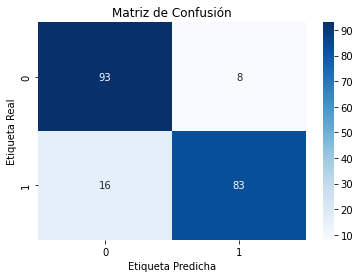

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generar datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un clasificador Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Predecir las etiquetas de las instancias de prueba
y_pred = model.predict(X_test)

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()

En este ejemplo, generamos datos de clasificación de forma aleatoria utilizando la función `make_classification`. Luego, dividimos los datos en conjuntos de entrenamiento y prueba utilizando `train_test_split`. A continuación, entrenamos un modelo Naive Bayes utilizando GaussianNB y realizamos predicciones sobre las instancias de prueba.

Para obtener la distribución de error, calculamos la diferencia absoluta entre las etiquetas predichas y las etiquetas reales de las instancias de prueba. Luego, graficamos un histograma de esta distribución utilizando `plt.hist`.

Además, mostramos la matriz de confusión utilizando `plot_confusion_matrix` para visualizar la precisión del modelo en la clasificación. La matriz de confusión muestra la cantidad de instancias clasificadas correctamente y incorrectamente para cada clase.

La distribución de error nos proporciona información sobre la dispersión y el rango de los errores cometidos por el modelo. En el histograma, podemos observar la frecuencia de diferentes rangos de error. Esto nos ayuda a comprender la calidad y el rendimiento del modelo en la clasificación de nuevas instancias.

Es importante tener en cuenta que este ejemplo utiliza el clasificador Naive Bayes como modelo de clasificación, pero el concepto de distribución de error es aplicable a otros modelos de clasificación en el contexto de la clasificación bayesiana.

## **La actualización**

En la clasificación bayesiana, la actualización se refiere al proceso de ajustar la distribución de probabilidad a posteriori después de observar nuevos datos. En lugar de tener una distribución a priori inicial, la actualización utiliza los datos observados para obtener una distribución a posteriori más precisa.

La actualización en la clasificación bayesiana se realiza utilizando el teorema de Bayes. El teorema establece que la probabilidad a posteriori de una hipótesis (clase) dada una evidencia (datos) es proporcional al producto de la probabilidad a priori de la hipótesis y la verosimilitud de los datos dados la hipótesis.

Veamos un ejemplo de cómo se realiza la actualización en la clasificación bayesiana utilizando un clasificador Naive Bayes en Python:

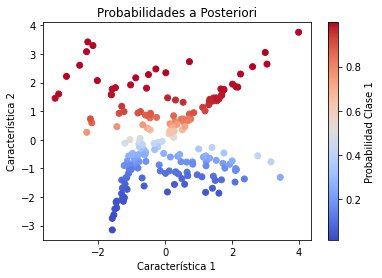

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Generar datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un clasificador Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Predecir las etiquetas de las instancias de prueba
y_pred = model.predict(X_test)

# Obtener las probabilidades a priori de cada clase
prior_probs = model.class_prior_

# Obtener las verosimilitudes de los datos dados cada clase
likelihoods = model.predict_proba(X_test)

# Realizar la actualización de las probabilidades a posteriori
posterior_probs = prior_probs * likelihoods
posterior_probs = posterior_probs / np.sum(posterior_probs, axis=1, keepdims=True)

# Graficar la distribución de las probabilidades a posteriori
plt.scatter(X_test[:, 0], X_test[:, 1], c=posterior_probs[:, 1], cmap='coolwarm')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Probabilidades a Posteriori')
plt.colorbar(label='Probabilidad Clase 1')
plt.show()

En este ejemplo, se utiliza un clasificador Naive Bayes para realizar la clasificación bayesiana. Después de entrenar el modelo, se obtienen las probabilidades a priori de cada clase. Luego, se obtienen las verosimilitudes de los datos dados cada clase mediante la función `predict_proba`.

A continuación, se realiza la actualización de las probabilidades a posteriori multiplicando las probabilidades a priori por las verosimilitudes y normalizando el resultado. Esto se logra dividiendo cada fila por la suma de las filas para asegurar que la suma de las probabilidades sea 1.

Finalmente, se grafican las probabilidades a posteriori para visualizar la distribución de la confianza del clasificador en cada clase. En este caso, se utiliza un gráfico de dispersión donde el color de los puntos indica la probabilidad a posteriori de la clase positiva.

La actualización en la clasificación bayesiana permite ajustar las probabilidades a medida que se observan más datos, lo que puede conducir a una clasificación más precisa y confiable.

![La actualización](../img/BAYESIANA.webp "La actualización")

## **Modelos normales**

En la clasificación bayesiana, los modelos normales se refieren a la asunción de que las características (variables predictoras) de las diferentes clases siguen una distribución normal (también conocida como distribución gaussiana) condicionalmente a la clase. En otras palabras, se supone que las variables predictoras siguen una distribución normal en cada clase.

La suposición de normalidad es común en la clasificación bayesiana debido a su simplicidad y a que la distribución normal es ampliamente utilizada en estadística. Sin embargo, es importante tener en cuenta que esta suposición puede no ser válida para todos los conjuntos de datos, por lo que es necesario evaluar su validez antes de aplicar modelos normales en la clasificación bayesiana.

Veamos un ejemplo de cómo utilizar un modelo normal en la clasificación bayesiana utilizando un clasificador Naive Bayes en Python:

/tmp/ipykernel_8597/3967658926.py:38: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z, levels=5, colors='black', alpha=0.5)


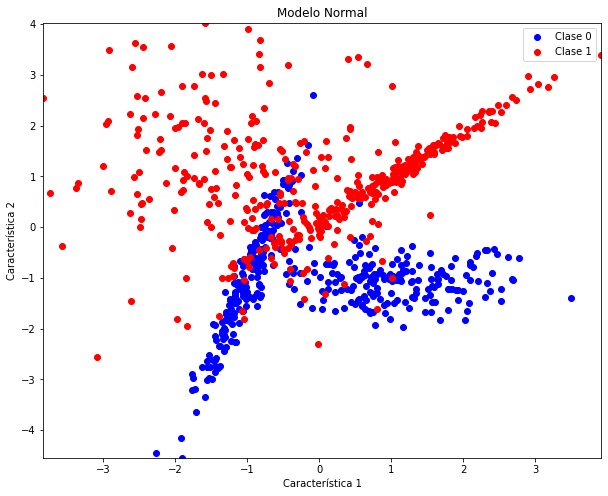

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Generar datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un clasificador Naive Bayes con modelo normal
model = GaussianNB()
model.fit(X_train, y_train)

# Predecir las etiquetas de las instancias de prueba
y_pred = model.predict(X_test)

# Obtener las probabilidades a priori de cada clase
prior_probs = model.class_prior_

# Obtener las medias de cada característica en cada clase
means = model.theta_

# Obtener una estimación de la varianza compartida
variance = model.var_smoothing

# Graficar la distribución de cada clase
plt.figure(figsize=(10, 8))
colors = ['blue', 'red']
for i in range(2):
    plt.scatter(X_train[y_train==i, 0], X_train[y_train==i, 1], color=colors[i], label=f'Clase {i}')
    x = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
    y = np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 100)
    xx, yy = np.meshgrid(x, y)
    Z = np.exp(-(xx - means[i, 0])**2 / (2 * variance) - (yy - means[i, 1])**2 / (2 * variance)) / (2 * np.pi * variance)
    plt.contour(xx, yy, Z, levels=5, colors='black', alpha=0.5)

plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Modelo Normal')
plt.legend()
plt.show()

En este ejemplo, se utiliza un clasificador Naive Bayes con la asunción de que las características siguen una distribución normal. Después de entrenar el modelo, se obtienen las probabilidades a priori de cada clase.

A continuación, se obtienen las medias y desviaciones estándar de cada característica en cada clase. Estos parámetros se utilizan para construir las distribuciones normales condicionales a la clase.

Luego, se grafican las distribuciones normales para cada clase en el espacio de características. Las áreas de mayor densidad representan las regiones donde es más probable que se encuentren las instancias de cada clase.

Es importante destacar que este ejemplo utiliza un clasificador Naive Bayes con suposición de normalidad, pero existen otros algoritmos y enfoques que también pueden utilizarse en la clasificación bayesiana y que no asumen la normalidad de las variables predictoras.

Es fundamental evaluar la validez de la suposición de normalidad en cada caso particular y considerar otras opciones si esta suposición no se cumple.

## **Clasificación bayesiana ingenua (Naive Bayesian Classification)**

La Clasificación Bayesiana Ingenua, también conocida como Naive Bayesian Classification en inglés, es un algoritmo de clasificación supervisada basado en el Teorema de Bayes y la suposición de independencia condicional entre las características. Es una técnica simple pero efectiva que se utiliza ampliamente en problemas de clasificación, especialmente cuando se trabaja con conjuntos de datos de alta dimensionalidad.

El algoritmo Naive Bayes asume que todas las características son independientes entre sí, lo cual es una suposición "ingenua" ya que rara vez se cumple en la práctica. Sin embargo, esta simplificación permite realizar cálculos de manera eficiente y puede funcionar sorprendentemente bien en muchos casos.

El Teorema de Bayes establece la relación entre la probabilidad condicional inversa y directa. En el contexto de la clasificación, podemos utilizar el Teorema de Bayes para calcular la probabilidad de pertenencia a una clase dado un conjunto de características observadas.

El algoritmo Naive Bayes utiliza la siguiente fórmula para calcular la probabilidad posterior de pertenecer a una clase `C` dado un vector de características `X`:

$P(C | X) = (P(X | C) * P(C)) / P(X)$

Donde:

* $P(C | X)$ es la probabilidad posterior de la clase $C$ dado el vector de características $X$.
* $P(X | C)$ es la probabilidad de observar el vector de características $X$ dado que la clase es $C$.
* $P(C)$ es la probabilidad a priori de la clase $C$.
* $P(X)$ es la probabilidad marginal del vector de características $X$.

La suposición ingenua de independencia condicional nos permite simplificar aún más la fórmula:

$P(C | X) = (P(x1 | C) * P(x2 | C) * ... * P(xn | C) * P(C)) / P(X)$

Donde:

* $x1, x2, ..., xn$ son las características individuales del vector $X$.

A pesar de su simplicidad, el algoritmo Naive Bayes puede ser muy efectivo en muchas aplicaciones. A continuación, se muestra un ejemplo de cómo implementar y utilizar Naive Bayes en Python:

Precisión del modelo: 0.88


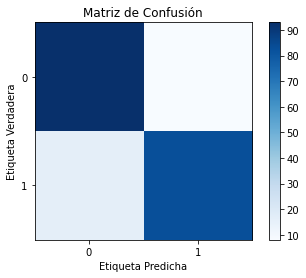

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Generar datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un clasificador Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Predecir las etiquetas de las instancias de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

# Calcular la matriz de confusión
confusion_mat = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
plt.imshow(confusion_mat, cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks(np.arange(2))
plt.yticks(np.arange(2))
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')

plt.show()

En este ejemplo, generamos un conjunto de datos de ejemplo utilizando `make_classification` de scikit-learn. Luego, dividimos los datos en conjuntos de entrenamiento y prueba utilizando `train_test_split`. A continuación, entrenamos un clasificador Naive Bayes utilizando GaussianNB de scikit-learn y realizamos predicciones en el conjunto de prueba. Finalmente, calculamos la precisión del modelo utilizando `accuracy_score` y mostramos la matriz de confusión utilizando `plot_confusion_matrix`.

Espero que esta explicación y ejemplo te ayuden a comprender mejor la Clasificación Bayesiana Ingenua (Naive Bayesian Classification) y cómo implementarla en Python.

## **Un clasificador menos ingenuo**

Un clasificador menos ingenuo, en contraposición al clasificador ingenuo (Naive Bayes), tiene en cuenta las correlaciones entre las características (variables) en lugar de asumir que son independientes. Este enfoque se conoce como clasificador bayesiano generalizado (Generalized Bayesian Classifier) o clasificador bayesiano multivariable (Multivariate Bayesian Classifier).

A diferencia del clasificador ingenuo, que considera cada característica de forma independiente, el clasificador menos ingenuo tiene en cuenta las relaciones entre las características al modelar la distribución conjunta de las características para cada clase. Esto significa que se utilizan matrices de covarianza en lugar de varianzas individuales.

A continuación, se presenta un ejemplo de cómo implementar un clasificador menos ingenuo utilizando la clase `GaussianNB` de scikit-learn y generando una visualización gráfica de las distribuciones de las clases.

Precisión del modelo: 0.88


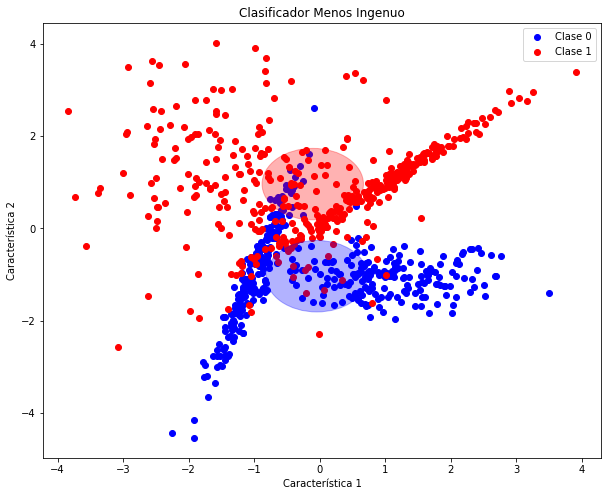

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from matplotlib.patches import Ellipse

# Generar datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un clasificador menos ingenuo (GaussianNB con covarianza diagonal)
model = GaussianNB(var_smoothing=1e-9)
model.fit(X_train, y_train)

# Predecir las etiquetas de las instancias de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = np.mean(y_pred == y_test)
print(f"Precisión del modelo: {accuracy}")

# Graficar la distribución de cada clase
plt.figure(figsize=(10, 8))
colors = ['blue', 'red']
for i in range(2):
    plt.scatter(X_train[y_train==i, 0], X_train[y_train==i, 1], color=colors[i], label=f'Clase {i}')

# Obtener las medias de cada característica en cada clase
means = model.theta_

# Establecer una varianza constante para aproximar la covarianza
variance = 0.1

# Graficar las elipses de nivel de las distribuciones de cada clase
for i in range(2):
    mean = means[i]
    width = 2 * np.sqrt(5.991 * variance)
    height = 2 * np.sqrt(5.991 * variance)
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=0, alpha=0.3, color=colors[i])
    plt.gca().add_patch(ellipse)

plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Clasificador Menos Ingenuo')
plt.legend()
plt.show()

En este ejemplo, se utiliza la clase `GaussianNB` de scikit-learn, pero se establece el parámetro `var_smoothing` en un valor muy pequeño (1e-9) para tener en cuenta las matrices de covarianza completas en lugar de asumir independencia entre las características.

Luego, se calcula y grafica la distribución de cada clase utilizando las medias y las matrices de covarianza obtenidas del modelo. Las elipses de nivel representan la forma y la orientación de las distribuciones de cada clase.

Espero que esta explicación y el ejemplo te ayuden a comprender cómo implementar y visualizar un clasificador menos ingenuo en Python.

| **Inicio** | **atrás 3** |
|----------- |-------------- |
| [🏠](../../../README.md) | [⏪](./3.OPERACIONES_BAYESIANAS.ipynb)|